In [1]:
import math
from scipy import signal
from PIL import Image
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from pylab import *
import cv2
import random

### Lucas Kanade

In [2]:
def LK_OpticalFlow(Image1, Image2, kernel_size):
    I1 = np.array(Image1)
    I2 = np.array(Image2)
    S = np.shape(I1)
    
    # Apply Gaussian filter of size - 3x3
    I1_smooth = cv2.GaussianBlur(I1, kernel_size, 0)
    I2_smooth = cv2.GaussianBlur(I2, kernel_size, 0)
    
    Ix = signal.convolve2d(I1_smooth, [[-0.25, 0.25], [-0.25, 0.25]], 'same') + signal.convolve2d(I2_smooth, [[-0.25, 0.25], [-0.25, 0.25]], 'same')
    Iy = signal.convolve2d(I1_smooth, [[-0.25, -0.25], [0.25, 0.25]], 'same') + signal.convolve2d(I2_smooth, [[-0.25, -0.25], [0.25, 0.25]], 'same')
    It = signal.convolve2d(I1_smooth, [[0.25, 0.25], [0.25, 0.25]], 'same') + signal.convolve2d(I2_smooth, [[-0.25, -0.25], [-0.25, -0.25]], 'same')
    
    features = cv2.goodFeaturesToTrack(I1_smooth, 10000, 0.01, 5)
    feature = np.int0(features)
    plt.figure(figsize=(12,8))
    for i in feature:
        x,y = i.ravel()
        cv2.circle(I1_smooth, (x,y), 3, 0, -1)
    u = v = np.nan*np.ones(S)
    for l in feature:
        j,i = l.ravel()
        IX = ([Ix[i-1,j-1],Ix[i,j-1],Ix[i-1,j-1],Ix[i-1,j],Ix[i,j],Ix[i+1,j],Ix[i-1,j+1],Ix[i,j+1],Ix[i+1,j-1]])
        IY = ([Iy[i-1,j-1],Iy[i,j-1],Iy[i-1,j-1],Iy[i-1,j],Iy[i,j],Iy[i+1,j],Iy[i-1,j+1],Iy[i,j+1],Iy[i+1,j-1]])
        IT = ([It[i-1,j-1],It[i,j-1],It[i-1,j-1],It[i-1,j],It[i,j],It[i+1,j],It[i-1,j+1],It[i,j+1],It[i+1,j-1]])
        
        LK = (IX, IY)
        LK = np.matrix(LK)
        LK_T = np.array(np.matrix(LK)) # A transpose
        LK = np.array(np.matrix.transpose(LK))
        
        A1 = np.dot(LK_T, LK) # Pseudo Inverse
        A2 = np.linalg.pinv(A1)
        A3 = np.dot(A2, LK_T)
        (u[i,j],v[i,j]) = np.dot(A3, IT)
    
    colors = "bgrcmykw"
    color_index = random.randrange(0,8)
    c=colors[color_index]
    
    # Plot the vectors on the image
    plt.title('Vector plot of Optical Flow')
    plt.imshow(I1, cmap = cm.gray)
    for i in range(S[0]):
        for j in range(S[1]):
            if(abs(u[i,j]) > t or abs(v[i,j]) > t):
                plt.arrow(j, i, v[i,j], u[i,j], head_width = 5, head_length = 5, color = c)
    plt.show()
    

## Synthetic Sphere Images
### Import the images

In [3]:
t = 0.3
Image1 = cv2.imread('sphere0.png', cv2.IMREAD_GRAYSCALE)
Image2 = cv2.imread('sphere1.png', cv2.IMREAD_GRAYSCALE)

### Set the font specifications

In [4]:
font = {
    'family' : 'Courier New',
    'color' : 'darkblue',
    'weight' : 'medium',
    'size' : 15,
}

### View the images of sphere

Text(0.5, 1.0, 'Sphere - Frame 1')

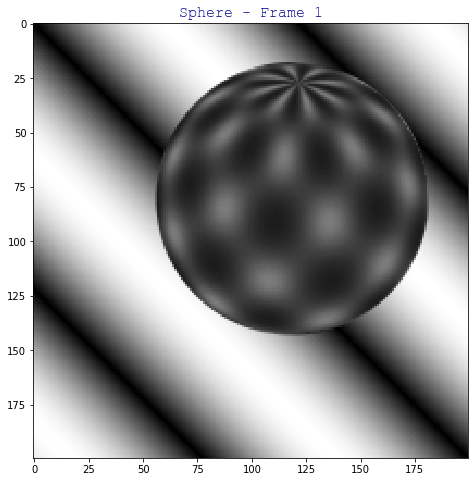

In [5]:
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(12,8))
plt.imshow(Image1, cmap='gray')
plt.title('Sphere - Frame 1', fontdict=font)

Text(0.5, 1.0, 'Sphere - Frame 2')

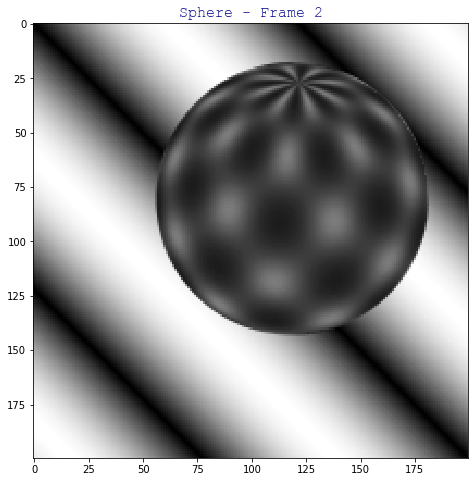

In [6]:
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(12,8))
plt.imshow(Image2, cmap='gray')
plt.title('Sphere - Frame 2', fontdict=font)

### Neighborhood size - 3

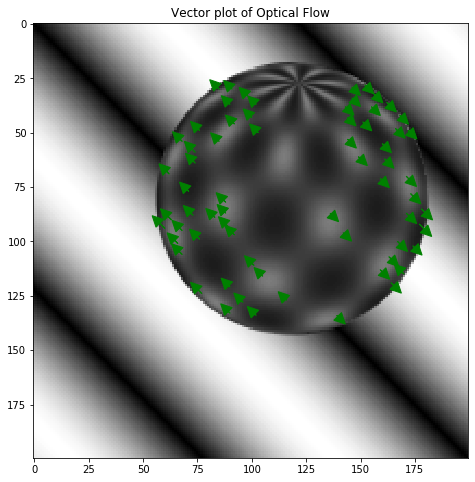

In [7]:
LK_OpticalFlow(Image1, Image2, kernel_size=(3,3))

### Neighborhood size - 5

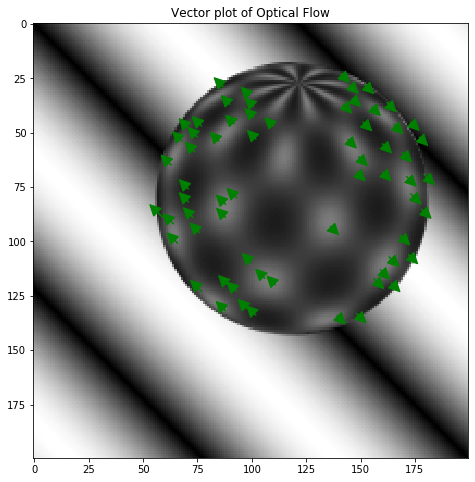

In [8]:
LK_OpticalFlow(Image1, Image2, kernel_size=(5,5))

### Neighborhood size - 11

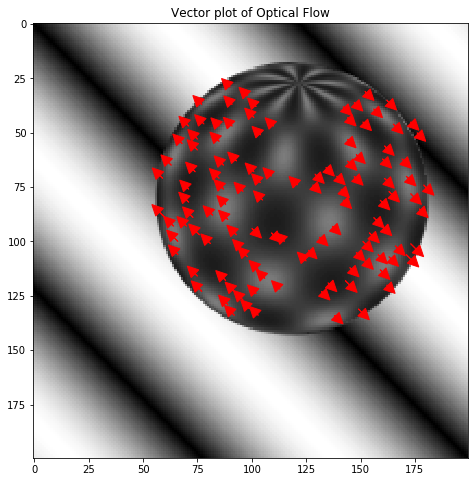

In [9]:
LK_OpticalFlow(Image1, Image2, kernel_size=(11,11))

### Neighborhood size - 21

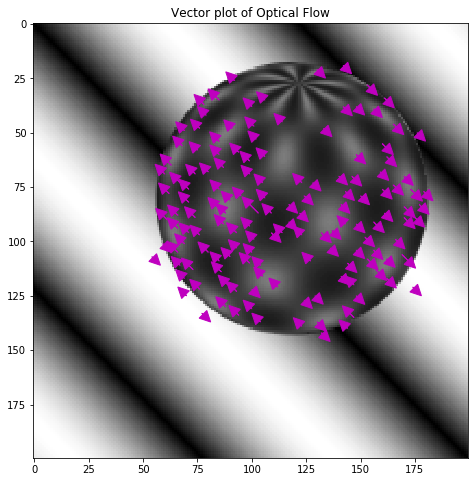

In [10]:
LK_OpticalFlow(Image1, Image2, kernel_size=(21,21))

## Real Traffic Images
### View the traffic images

In [11]:
Image1 = cv2.imread('traffic0.png', cv2.IMREAD_GRAYSCALE)
Image2 = cv2.imread('traffic1.png', cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Traffic - Frame 1')

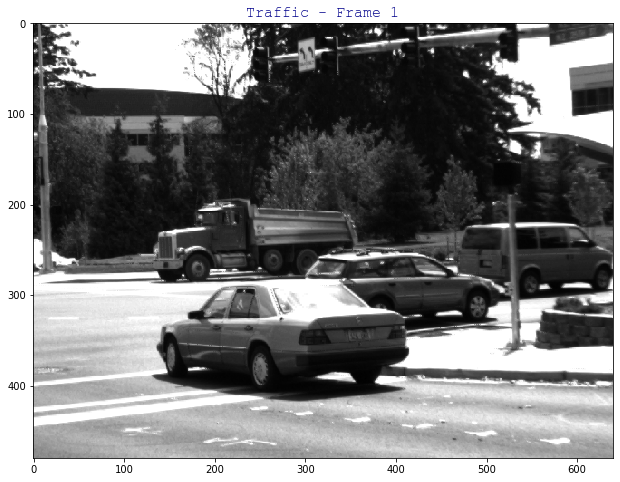

In [12]:
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(12,8))
plt.imshow(Image1, cmap='gray')
plt.title('Traffic - Frame 1', fontdict=font)

Text(0.5, 1.0, 'Traffic - Frame 2')

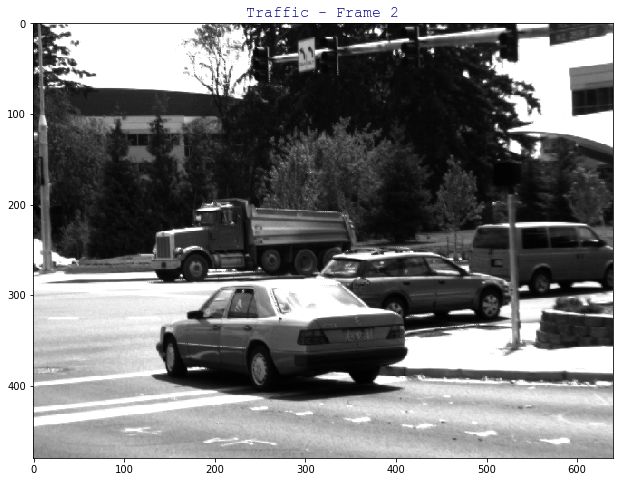

In [13]:
plt.rcParams["axes.grid"] = False
fig = plt.figure(figsize=(12,8))
plt.imshow(Image2, cmap='gray')
plt.title('Traffic - Frame 2', fontdict=font)

### Neighborhood size - 3

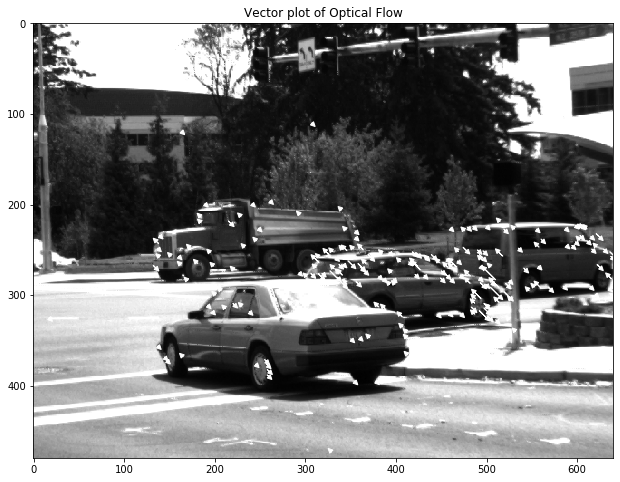

In [14]:
LK_OpticalFlow(Image1, Image2, kernel_size=(3,3))

### Neighborhood size - 5

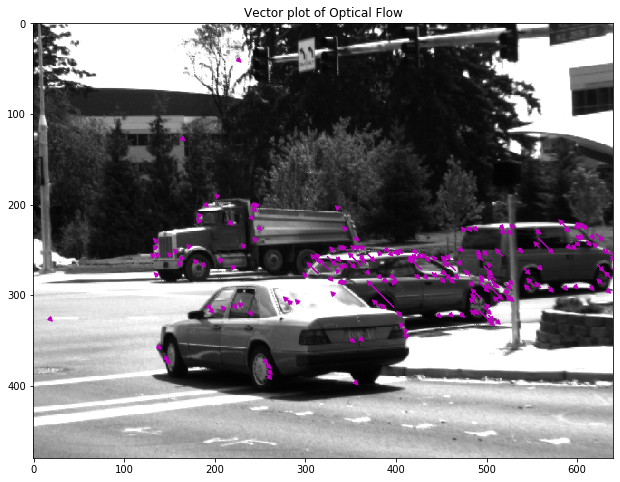

In [15]:
LK_OpticalFlow(Image1, Image2, kernel_size=(5,5))

### Neighborhood size - 21

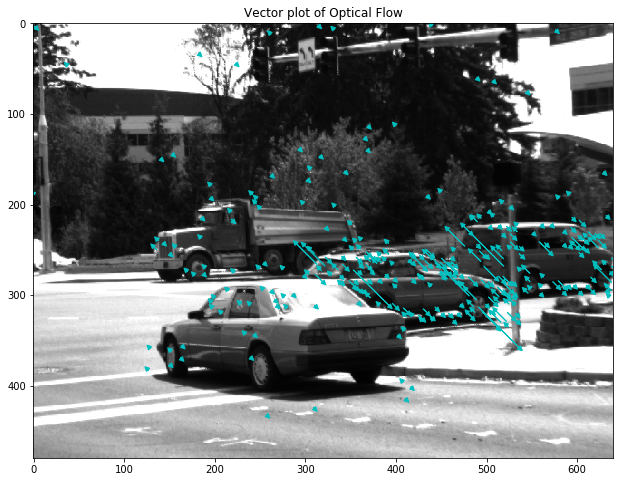

In [16]:
LK_OpticalFlow(Image1, Image2, kernel_size=(21,21))

### Best result for traffic images

### Neighborhood size - 11

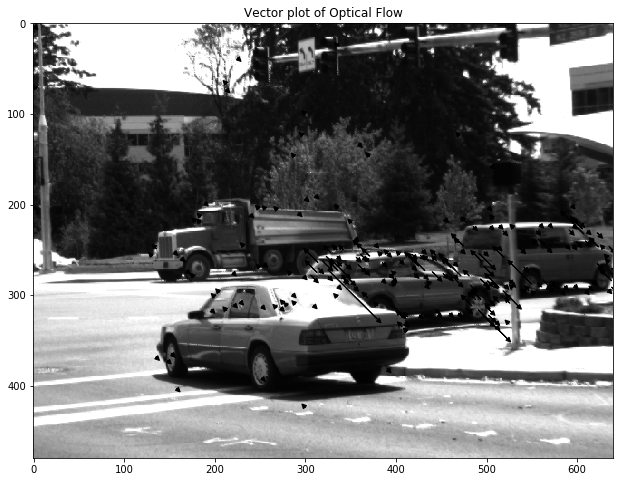

In [17]:
LK_OpticalFlow(Image1, Image2, kernel_size=(11,11))